# NSW Emissions

In [1]:
import geopandas as gp
import shapely
import fiona

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:

shp_file_name = "NSW_LOCALITY_POLYGON_shp/NSW_LOCALITY_POLYGON_shp.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = ("https://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
                 "5e295412-357c-49a2-98d5-6caf099c2339/download/nsw_locality_polygon_shp.zip")


In [3]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [4]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [5]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'scroll': True,
})

{'scroll': True}

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [7]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [8]:
nsw_data = pd.read_excel("emissions_nsw_only.xlsx")

## What data are we working with ?

In [9]:
print("We have\n{} Rows\n{} Columns".format(nsw_data.shape[1], nsw_data.shape[0]))

We have
27 Rows
128080 Columns


In [10]:
nsw_data.head()

,report_id,report_year,facility_id,jurisdiction_code,jurisdiction_facility_id,facility_name,registered_business_name,primary_anzsic_class_code,primary_anzsic_class_name,substance_id,...,water_emission_kg,water_eet,land_emission_kg,land_eet,suburb,state,postcode,latitude,longitude,pivot_facility_name
0,499174,2017/2018,494660,NSW,836,A J Bush and Sons Riverstone,A.J. BUSH & SONS (MANUFACTURES) PTY LTD,1111,Meat Processing,11,...,NaN,NaN,NaN,NaN,Riverstone,NSW,2765,-33.66814,150.900607,A J Bush and Sons Riverstone NSW (836)
1,499174,2017/2018,494660,NSW,836,A J Bush and Sons Riverstone,A.J. BUSH & SONS (MANUFACTURES) PTY LTD,1111,Meat Processing,14,...,NaN,NaN,NaN,NaN,Riverstone,NSW,2765,-33.66814,150.900607,A J Bush and Sons Riverstone NSW (836)
2,499174,2017/2018,494660,NSW,836,A J Bush and Sons Riverstone,A.J. BUSH & SONS (MANUFACTURES) PTY LTD,1111,Meat Processing,18,...,NaN,NaN,NaN,NaN,Riverstone,NSW,2765,-33.66814,150.900607,A J Bush and Sons Riverstone NSW (836)
3,499174,2017/2018,494660,NSW,836,A J Bush and Sons Riverstone,A.J. BUSH & SONS (MANUFACTURES) PTY LTD,1111,Meat Processing,20,...,NaN,NaN,NaN,NaN,Riverstone,NSW,2765,-33.66814,150.900607,A J Bush and Sons Riverstone NSW (836)
4,499174,2017/2018,494660,NSW,836,A J Bush and Sons Riverstone,A.J. BUSH & SONS (MANUFACTURES) PTY LTD,1111,Meat Processing,26,...,NaN,NaN,NaN,NaN,Riverstone,NSW,2765,-33.66814,150.900607,A J Bush and Sons Riverstone NSW (836)


In [11]:
"""
What does this dataset explain?
    emission in nsw
    factories that / establishments that create them
    the type of factory / extablishment  
    location of the factory / establishment
    type of substace creating the emission
    total emission in the air
    
Why was it collected?
    to understand the amount of toxic substance that is emitted in the environment 
    
Who paid for it?
    the government i think 
    
Where did you get it from?
    government data website
    https://data.gov.au/dataset/ds-dga-043f58e0-a188-4458-b61c-04e5b540aea4/distribution/dist-dga-5fc315e6-abe9-4a46-a3fc-93359369c00f/details?q=

"""

'\nWhat does this dataset explain?\n    emission in nsw\n    factories that / establishments that create them\n    the type of factory / extablishment  \n    location of the factory / establishment\n    type of substace creating the emission\n    total emission in the air\n    \nWhy was it collected?\n    to understand the amount of toxic substance that is emitted in the environment \n    \nWho paid for it?\n    the government i think \n    \nWhere did you get it from?\n    government data website\n    https://data.gov.au/dataset/ds-dga-043f58e0-a188-4458-b61c-04e5b540aea4/distribution/dist-dga-5fc315e6-abe9-4a46-a3fc-93359369c00f/details?q=\n\n'

In [12]:
nsw_data.columns

Index(['report_id', 'report_year', 'facility_id', 'jurisdiction_code',
       'jurisdiction_facility_id', 'facility_name', 'registered_business_name',
       'primary_anzsic_class_code', 'primary_anzsic_class_name',
       'substance_id', 'substance_sort_order', 'substance_name',
       'air_point_emission_kg', 'air_point_eet', 'air_fugitive_emission_kg',
       'air_fugitive_eet', 'air_total_emission_kg', 'water_emission_kg',
       'water_eet', 'land_emission_kg', 'land_eet', 'suburb', 'state',
       'postcode', 'latitude', 'longitude', 'pivot_facility_name'],
      dtype='object')

## What type of data does each row contain ?

In [13]:
row_one = nsw_data.iloc[0]
row_one

report_id                                                     499174
report_year                                                2017/2018
facility_id                                                   494660
jurisdiction_code                                                NSW
jurisdiction_facility_id                                         836
facility_name                           A J Bush and Sons Riverstone
registered_business_name     A.J. BUSH & SONS (MANUFACTURES) PTY LTD
primary_anzsic_class_code                                       1111
primary_anzsic_class_name                            Meat Processing
substance_id                                                      11
substance_sort_order                                              12
substance_name                                   Arsenic & compounds
air_point_emission_kg                                      0.0260986
air_point_eet                                                  ___4_
air_fugitive_emission_kg          

In [14]:
for i in range(len(row_one)):
    print(row_one[i])

499174
2017/2018
494660
NSW
836
A J Bush and Sons Riverstone
A.J. BUSH & SONS (MANUFACTURES) PTY LTD
1111
Meat Processing
11
12
Arsenic & compounds
0.0260985992919922
___4_
nan
nan
0.0260985992919922
nan
nan
nan
nan
Riverstone
NSW
2765
-33.66814
150.900607
A J Bush and Sons Riverstone NSW (836)


## Continuous or Catagorical

In [15]:
con_dex = []
cat_dex = []



for i in range(len(row_one)):
    try:
        float(row_one[i])
        con_dex.append(i)
    except:
        cat_dex.append(i)

print(str("CON COL IDS"), con_dex)
print(str("CAT COL IDS"), cat_dex)

print(" ")
print(str("---CONTINIOUS---\n"))
for num in con_dex:
    print(str(nsw_data.columns[num]).upper(),"(CN-{})".format(num),"\n" ,row_one[num],"\n")

print(" ")
print(str("---CATAGORICAL---\n"))
for num in cat_dex:
    print(str(nsw_data.columns[num]).upper(),"(CN-{})".format(num),"\n" ,row_one[num],"\n")

CON COL IDS [0, 2, 4, 7, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25]
CAT COL IDS [1, 3, 5, 6, 8, 11, 13, 21, 22, 26]
 
---CONTINIOUS---

REPORT_ID (CN-0) 
 499174 

FACILITY_ID (CN-2) 
 494660 

JURISDICTION_FACILITY_ID (CN-4) 
 836 

PRIMARY_ANZSIC_CLASS_CODE (CN-7) 
 1111 

SUBSTANCE_ID (CN-9) 
 11 

SUBSTANCE_SORT_ORDER (CN-10) 
 12 

AIR_POINT_EMISSION_KG (CN-12) 
 0.0260985992919922 

AIR_FUGITIVE_EMISSION_KG (CN-14) 
 nan 

AIR_FUGITIVE_EET (CN-15) 
 nan 

AIR_TOTAL_EMISSION_KG (CN-16) 
 0.0260985992919922 

WATER_EMISSION_KG (CN-17) 
 nan 

WATER_EET (CN-18) 
 nan 

LAND_EMISSION_KG (CN-19) 
 nan 

LAND_EET (CN-20) 
 nan 

POSTCODE (CN-23) 
 2765 

LATITUDE (CN-24) 
 -33.66814 

LONGITUDE (CN-25) 
 150.900607 

 
---CATAGORICAL---

REPORT_YEAR (CN-1) 
 2017/2018 

JURISDICTION_CODE (CN-3) 
 NSW 

FACILITY_NAME (CN-5) 
 A J Bush and Sons Riverstone 

REGISTERED_BUSINESS_NAME (CN-6) 
 A.J. BUSH & SONS (MANUFACTURES) PTY LTD 

PRIMARY_ANZSIC_CLASS_NAME (CN-8) 
 Meat Processi

## Looking at the Categorical Data 

In [16]:
for num in cat_dex:
    col = nsw_data.columns[num]
    print("\n ---" ,col.upper(),"---")
    val = nsw_data[col].value_counts()
    print(val)
    
    
#  df["column_name"].value_counts()


 --- REPORT_YEAR ---
2017/2018    8108
2011/2012    7928
2015/2016    7904
2014/2015    7808
2013/2014    7798
2016/2017    7751
2012/2013    7669
2010/2011    7572
2008/2009    7319
2009/2010    7150
2007/2008    6982
2005/2006    6490
2006/2007    6488
2004/2005    6383
2002/2003    6162
2003/2004    6120
2001/2002    5374
2000/2001    3485
1999/2000    2473
1998/1999    1116
Name: report_year, dtype: int64

 --- JURISDICTION_CODE ---
NSW    128080
Name: jurisdiction_code, dtype: int64

 --- FACILITY_NAME ---
BlueScope Steel Port Kembla Steelworks       728
Tharbogang Landfill                          631
Bloomfield Colliery                          570
Qenos Olefines and Site Utilities Plants     524
Caltex Kurnell Refinery                      522
Bindaree Beef Inverell                       521
Hunter Valley Operations                     510
Bayswater Power Station                      503
Liddell Power Station                        499
Rix's Creek Pty Limited                  

BlueScope Steel Port Kembla Steelworks, Port Kembla NSW (360)                844
Qenos Olefines and Site Utilities Plants, Matraville NSW (139)               709
BANZ, Manufacturing - Springhill, Port Kembla NSW (134)                      682
Tharbogang Landfill, Tharbogang, Griffith NSW (583)                          631
Caltex Kurnell Terminal, Kurnell NSW (298)                                   594
Bloomfield Colliery, Ashtonfield NSW (390)                                   570
Redbank Power (Receivers & Managers Appointed), Warkworth NSW (474)          538
Bulga Coal Surface and Underground Operations, Singleton NSW (337)           528
Rix's Creek Mine, Singleton NSW (356)                                        526
Bindaree Beef Inverell NSW (888)                                             521
Hunter Valley Operations, Lemington Via Singleton NSW (143)                  519
Bayswater Power Station, Muswellbrook NSW (37)                               506
Liddell Power Station, Muswe

Questions ?

- Top 10 years and bottom 10 years for number of reports filed?
    - Facilty Name
- Top 10 Facilities and bottom 10 Facilities with reports filed ?
    - Facility Name
- Top 10 Registed Business and bottom 10 Registered Business with reports filed?
    - Registered Business Name
- Top and Bottom 10 ANZSIC Class of causing emissions?
    - Primary ANZNIC Class Name
- Top and bottom 10 Substances Emited?
    - Substance Name
- Top and Bottom 10 Suburbs with emitting facilities ?
    - Suburb
- Top and Bottom 10 Processing Facility Name ?
    - Pivot Facility Name 


--- REPORT_YEAR ---
--- JURISDICTION_CODE ---
--- FACILITY_NAME ---
--- REGISTERED_BUSINESS_NAME ---
--- PRIMARY_ANZSIC_CLASS_NAME ---
--- SUBSTANCE_NAME ---
--- AIR_POINT_EET ---
--- SUBURB ---
--- STATE ---
--- PIVOT_FACILITY_NAME ---


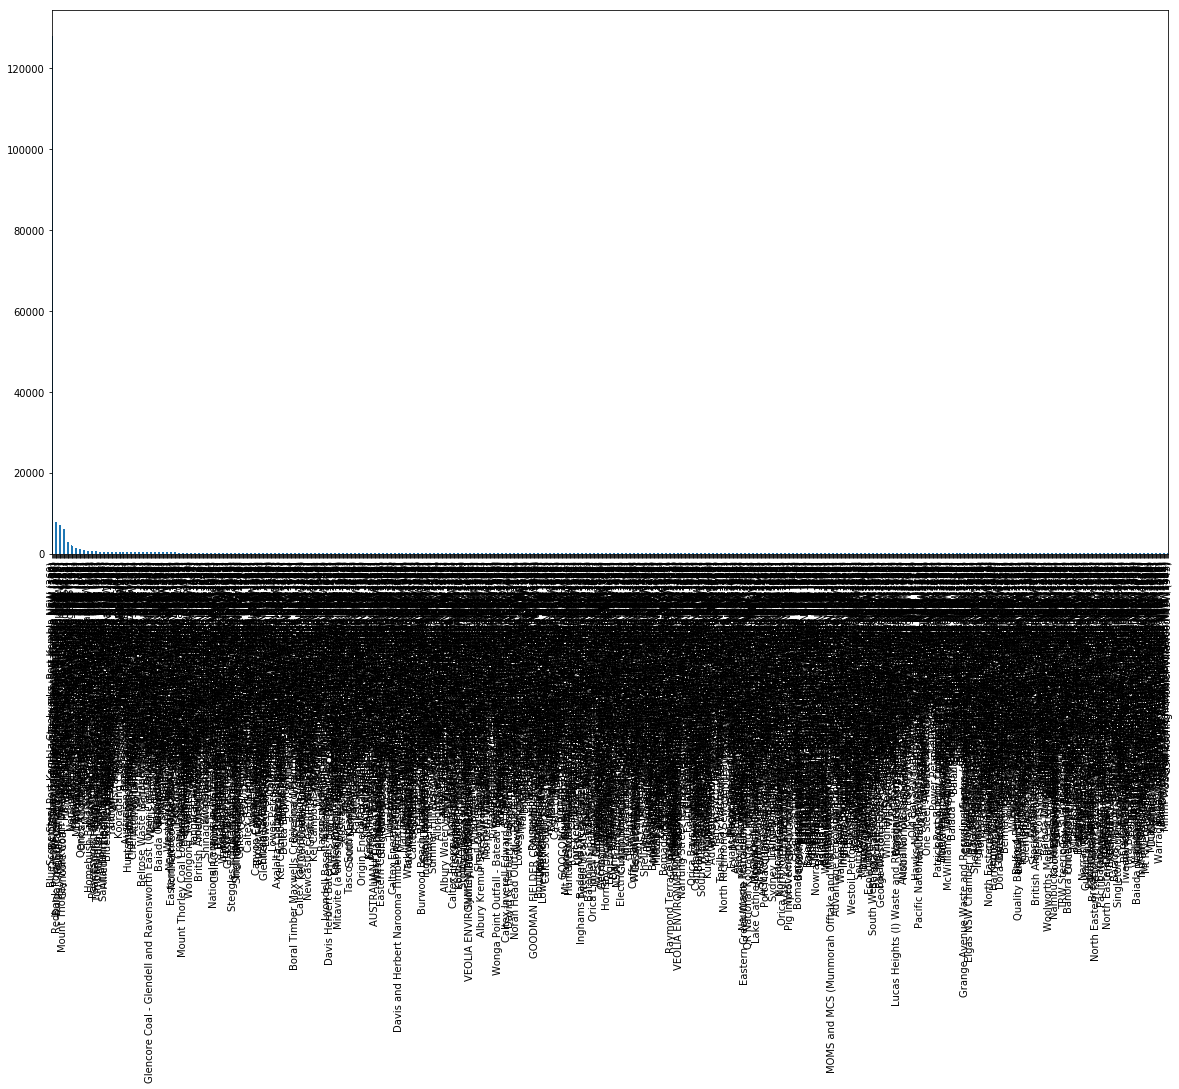

In [17]:
col = []

graph = []

graph_seires = pd.Series

for num in cat_dex:
    col.append(nsw_data.columns[num])

for name in col:
    print("---" ,name.upper(),"---")
    graph.append(nsw_data[name].value_counts())

# for col in graph:
#     col.plot(kind = "bar")

for i in range(len(graph)):
    graph[i].plot(kind = "bar")

# graph[2].plot(kind = "bar")

# df["column_name"].value_counts().plot(kind="bar")

['report_id', 'facility_id', 'jurisdiction_facility_id', 'primary_anzsic_class_code', 'substance_id', 'substance_sort_order', 'air_point_emission_kg', 'air_fugitive_emission_kg', 'air_fugitive_eet', 'air_total_emission_kg', 'water_emission_kg', 'water_eet', 'land_emission_kg', 'land_eet', 'postcode', 'latitude', 'longitude']
report_id


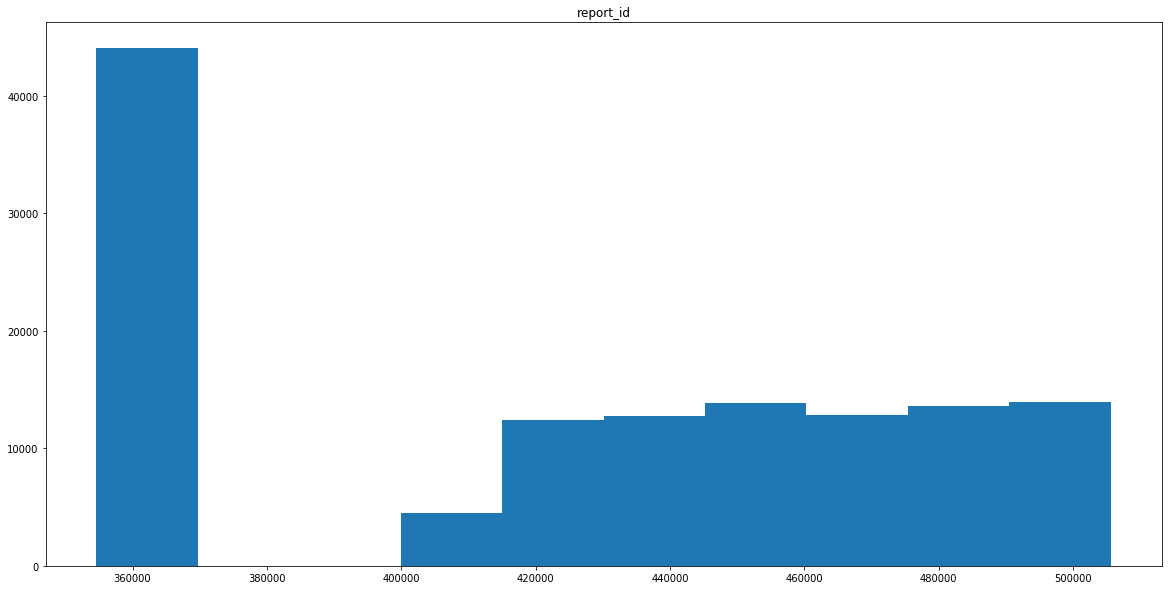

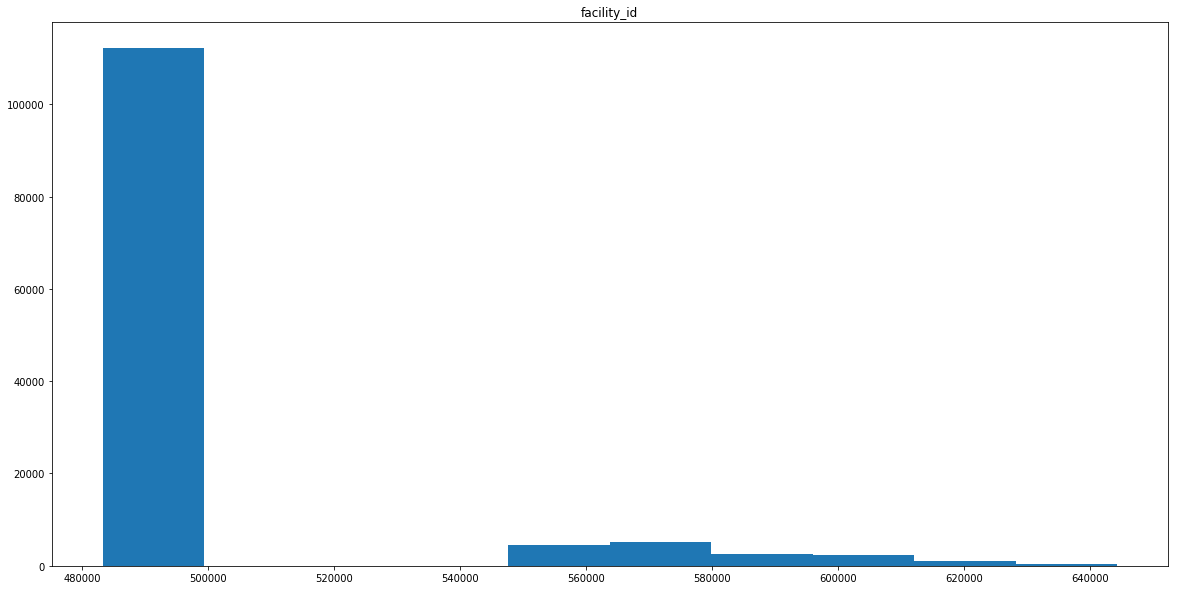

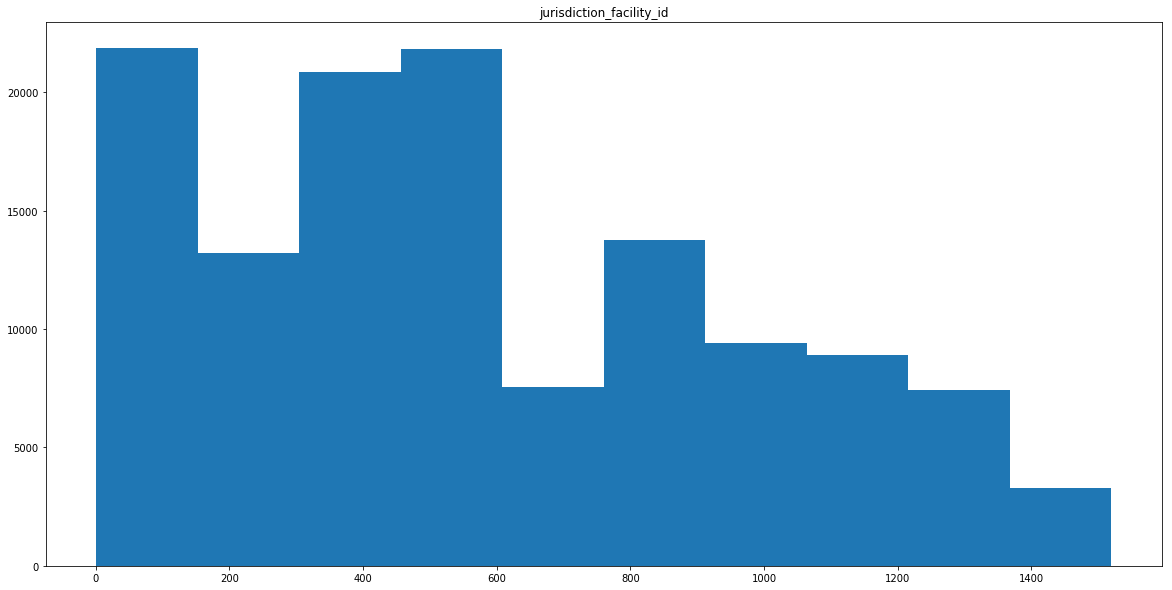

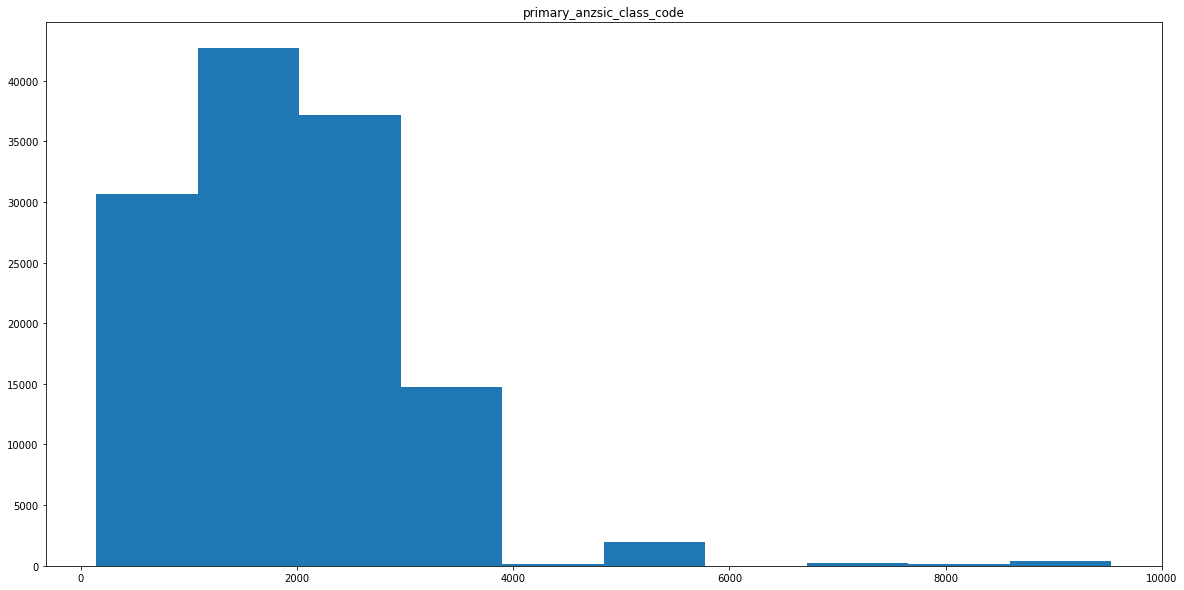

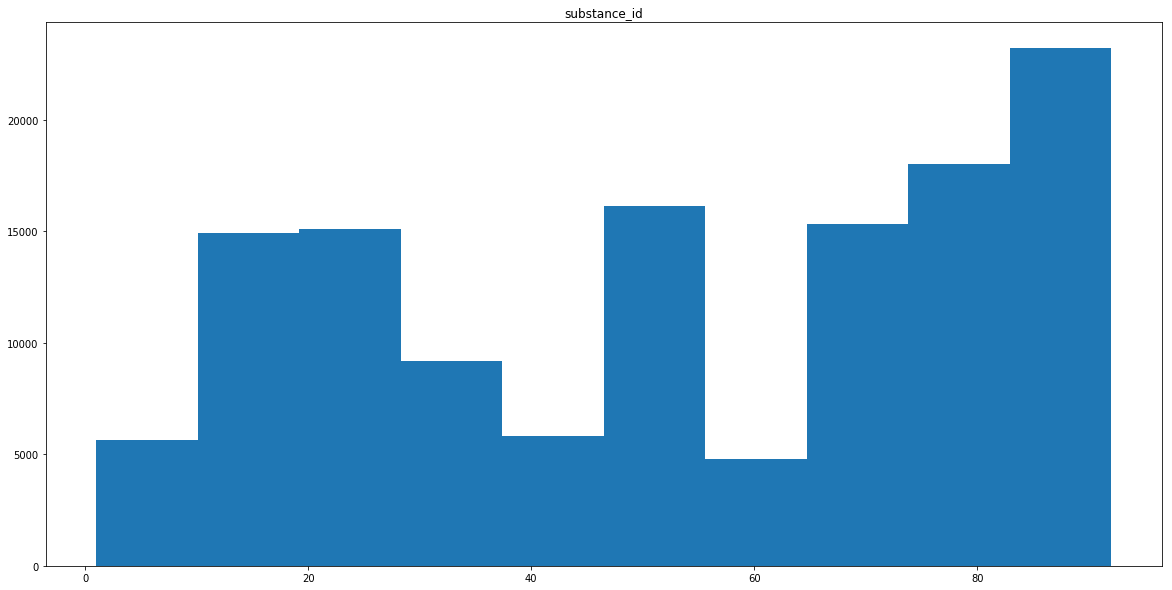

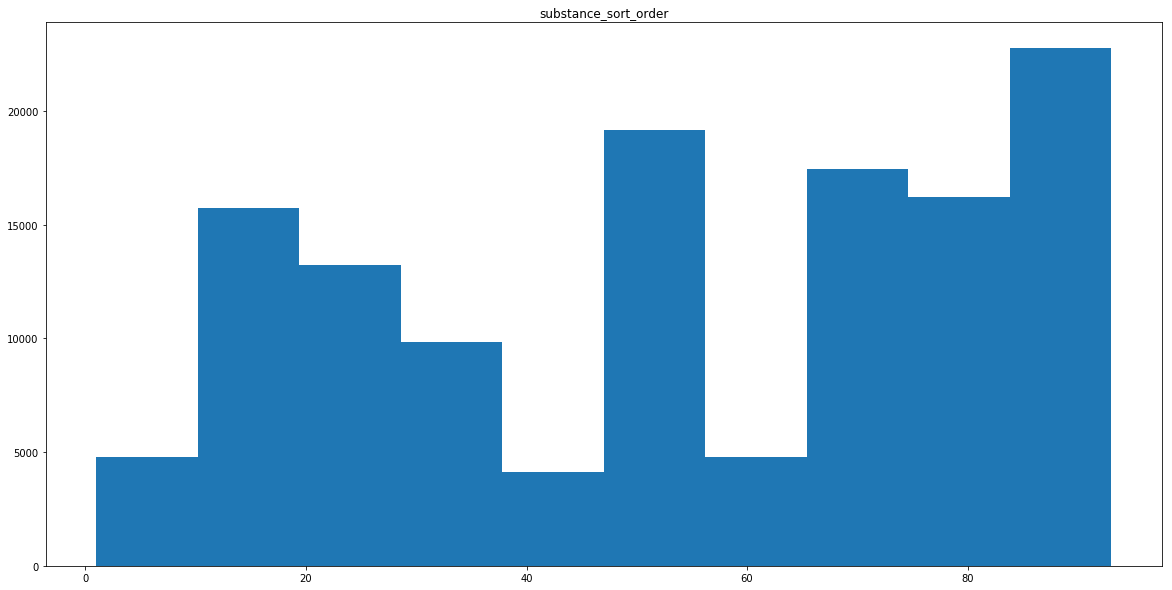

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


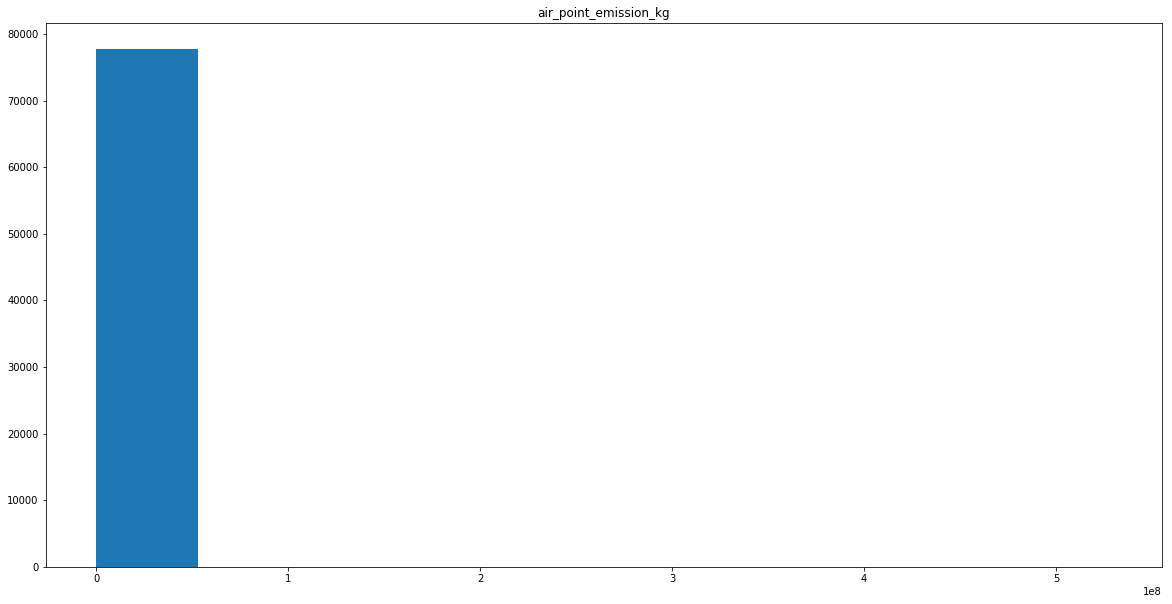

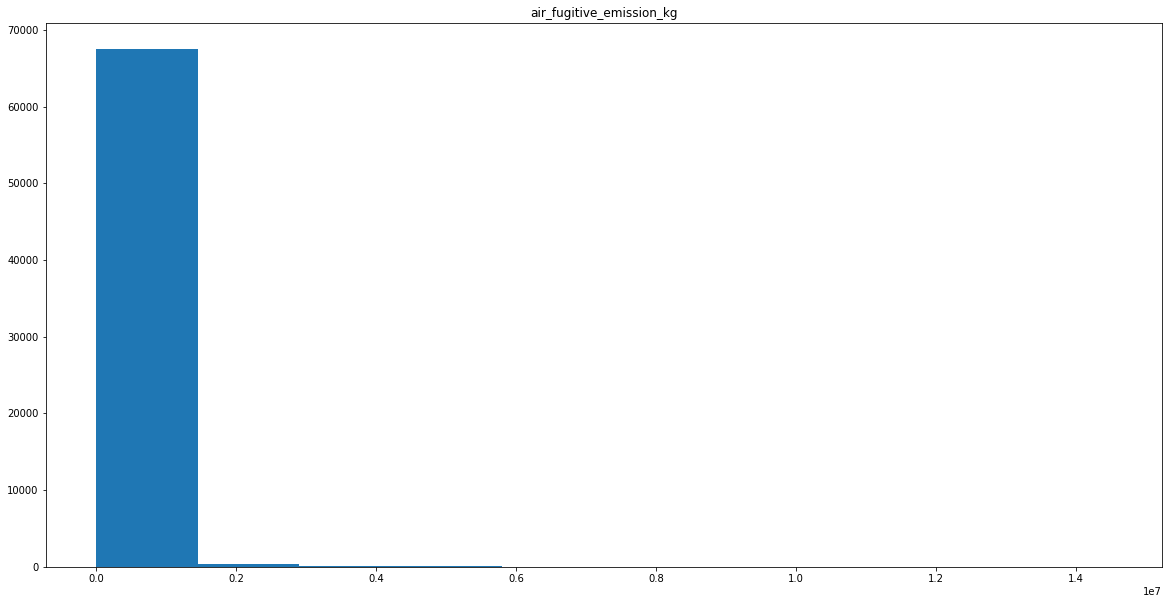

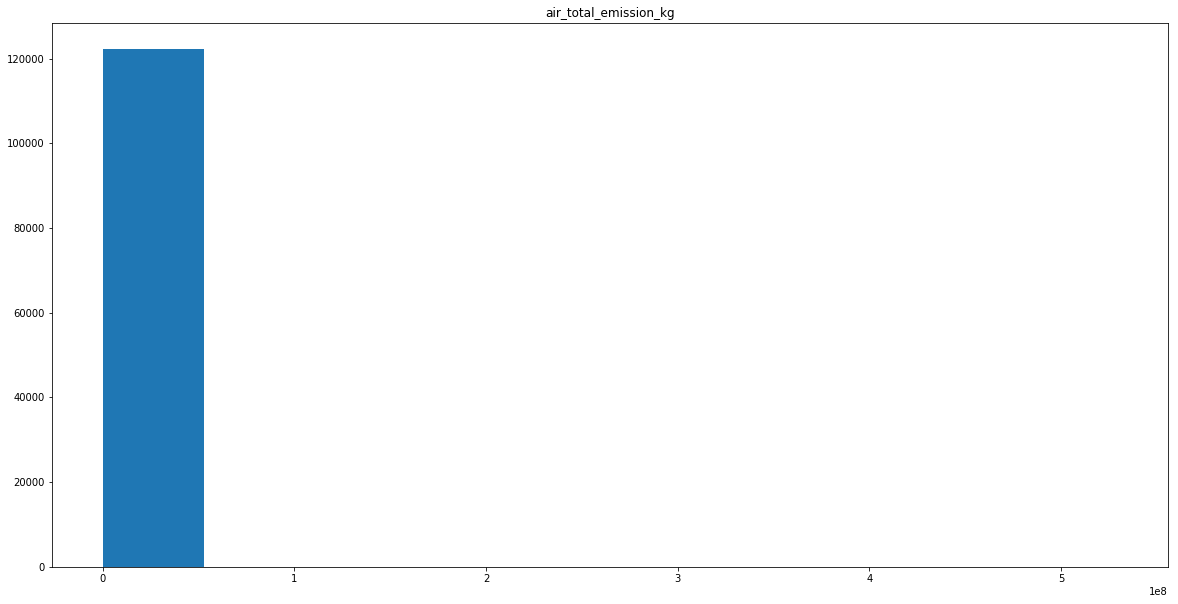

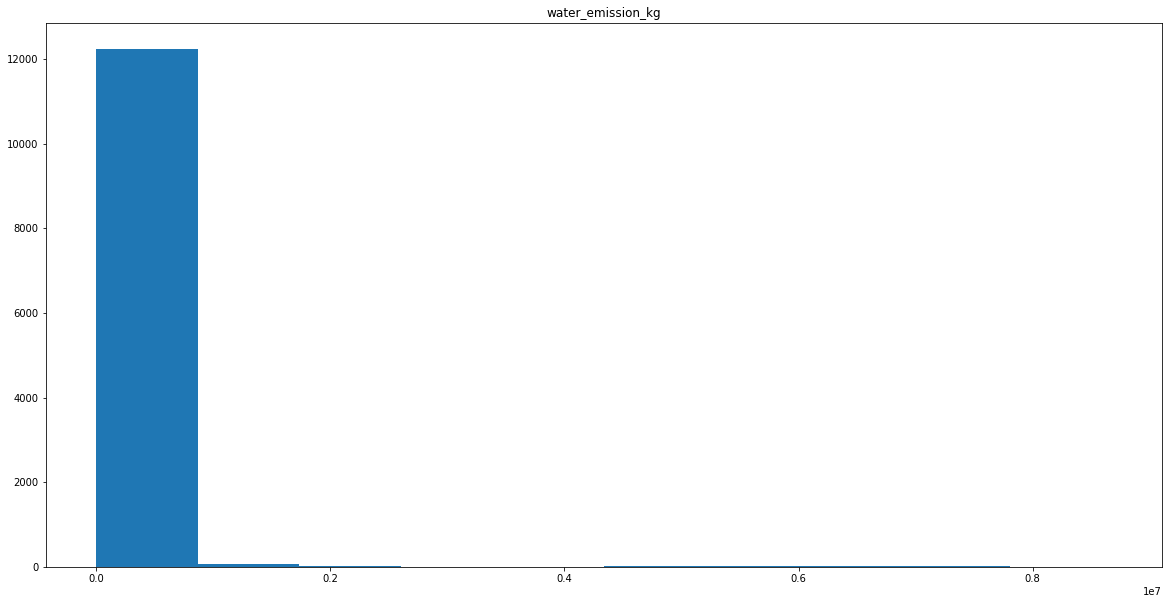

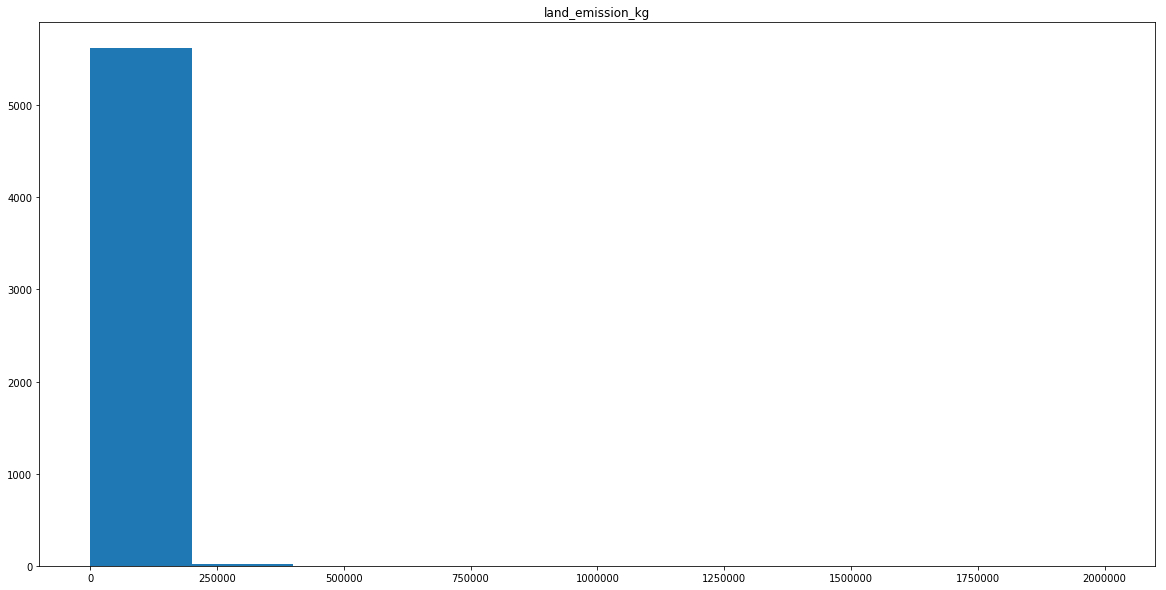

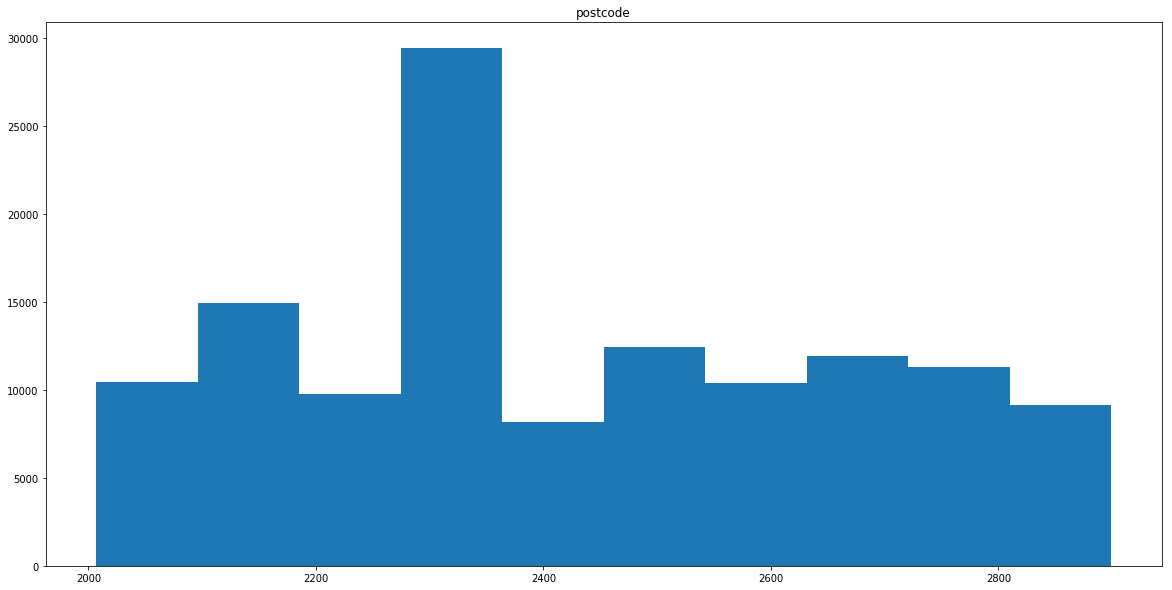

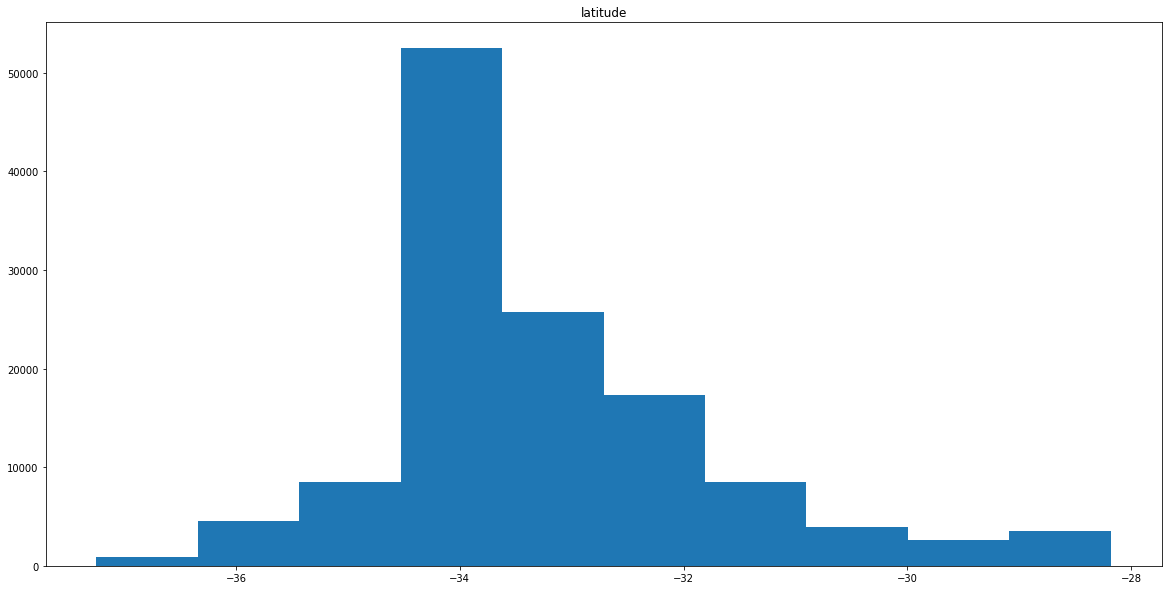

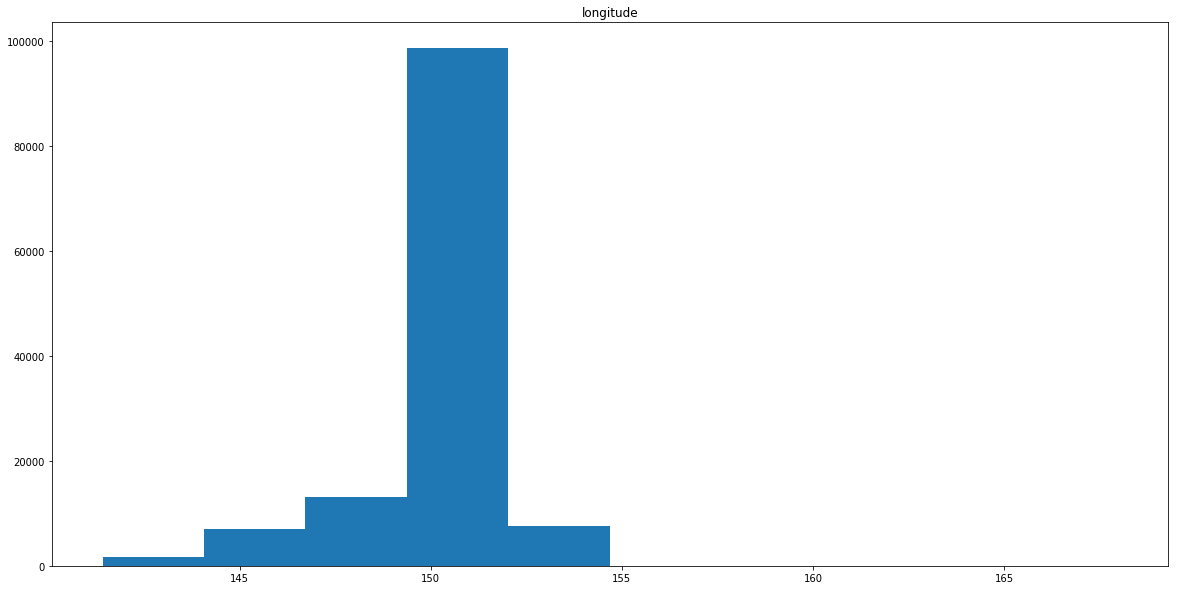

In [18]:
con_col = []

sml_con = con_col[1:3]



for num in con_dex:
    con_col.append(nsw_data.columns[num])

print(con_col)
nsw_data.columns[2]

test = con_col[0]

sml_con = con_col[1:3]

print(test)
for name in con_col:
    try:
        plt.hist(nsw_data[name])
        plt.title(name)
        plt.show()
    except:
        pass



# df["column_name"].hist()

## Looking at Continous Data 

In [19]:
print(str("---CONTINIOUS---\n"))
for num in con_dex:
    print(str(nsw_data.columns[num]).upper(),"(CN-{})".format(num),"\n" ,row_one[num],"\n")

---CONTINIOUS---

REPORT_ID (CN-0) 
 499174 

FACILITY_ID (CN-2) 
 494660 

JURISDICTION_FACILITY_ID (CN-4) 
 836 

PRIMARY_ANZSIC_CLASS_CODE (CN-7) 
 1111 

SUBSTANCE_ID (CN-9) 
 11 

SUBSTANCE_SORT_ORDER (CN-10) 
 12 

AIR_POINT_EMISSION_KG (CN-12) 
 0.0260985992919922 

AIR_FUGITIVE_EMISSION_KG (CN-14) 
 nan 

AIR_FUGITIVE_EET (CN-15) 
 nan 

AIR_TOTAL_EMISSION_KG (CN-16) 
 0.0260985992919922 

WATER_EMISSION_KG (CN-17) 
 nan 

WATER_EET (CN-18) 
 nan 

LAND_EMISSION_KG (CN-19) 
 nan 

LAND_EET (CN-20) 
 nan 

POSTCODE (CN-23) 
 2765 

LATITUDE (CN-24) 
 -33.66814 

LONGITUDE (CN-25) 
 150.900607 



A lot of the information is repeated 
eg the code of a substabce emited is the same as the name of a substance 

- Important Information gained 
    - Longitude
    - Latitude

- Interesting Columns to look at
    - Total Air Emission per kg 

## Max | Min | Mean | Median | Mode

In [20]:
# for name in con_col:
#     print("---", name, "---")
#     nsw_data[name].max()

for name in con_col:
    vals = nsw_data[name]
    try:
        maxv = vals.max()
        minv = vals.min()
        meav = vals.mean()
        midv = vals.median()
        modv = vals.mode()
        print("---",name.upper(),"---",
              "\n MAX -->",    int(maxv),  "\n ",
              "\n MIN -->",    int(minv),  "\n ",
              "\n MEAN -->",   int(meav),  "\n ",
              "\n MEDIAN -->", int(midv),  "\n ",
              "\n MODE -->",   int(modv),  "\n ",
              "\n ",
              "\n ")

    except:
        pass
    

--- FACILITY_ID --- 
 MAX --> 644280 
  
 MIN --> 483246 
  
 MEAN --> 500550 
  
 MEDIAN --> 489946 
  
 MODE --> 487830 
  
  
 
--- JURISDICTION_FACILITY_ID --- 
 MAX --> 1519 
  
 MIN --> 1 
  
 MEAN --> 583 
  
 MEDIAN --> 505 
  
 MODE --> 360 
  
  
 
--- PRIMARY_ANZSIC_CLASS_CODE --- 
 MAX --> 9531 
  
 MIN --> 143 
  
 MEAN --> 1851 
  
 MEDIAN --> 1812 
  
 MODE --> 600 
  
  
 
--- SUBSTANCE_ID --- 
 MAX --> 92 
  
 MIN --> 1 
  
 MEAN --> 52 
  
 MEDIAN --> 55 
  
 MODE --> 85 
  
  
 
--- SUBSTANCE_SORT_ORDER --- 
 MAX --> 93 
  
 MIN --> 1 
  
 MEAN --> 53 
  
 MEDIAN --> 56 
  
 MODE --> 88 
  
  
 
--- AIR_POINT_EMISSION_KG --- 
 MAX --> 528586400 
  
 MIN --> 0 
  
 MEAN --> 204778 
  
 MEDIAN --> 24 
  
 MODE --> 0 
  
  
 
--- AIR_FUGITIVE_EMISSION_KG --- 
 MAX --> 14500652 
  
 MIN --> 0 
  
 MEAN --> 41819 
  
 MEDIAN --> 40 
  
 MODE --> 1 
  
  
 
--- AIR_TOTAL_EMISSION_KG --- 
 MAX --> 529289600 
  
 MIN --> 0 
  
 MEAN --> 153880 
  
 MEDIAN --> 31 
  
 MODE --

## Which year had the most reported cases ?

2017/2018    8108
2016/2017    7751
2015/2016    7904
2014/2015    7808
2013/2014    7798
2012/2013    7669
2011/2012    7928
2010/2011    7572
2009/2010    7150
2008/2009    7319
2007/2008    6982
2006/2007    6488
2005/2006    6490
2004/2005    6383
2003/2004    6120
2002/2003    6162
2001/2002    5374
2000/2001    3485
1999/2000    2473
1998/1999    1116
Name: report_year, dtype: int64
20


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 20 Text xticklabel objects>)

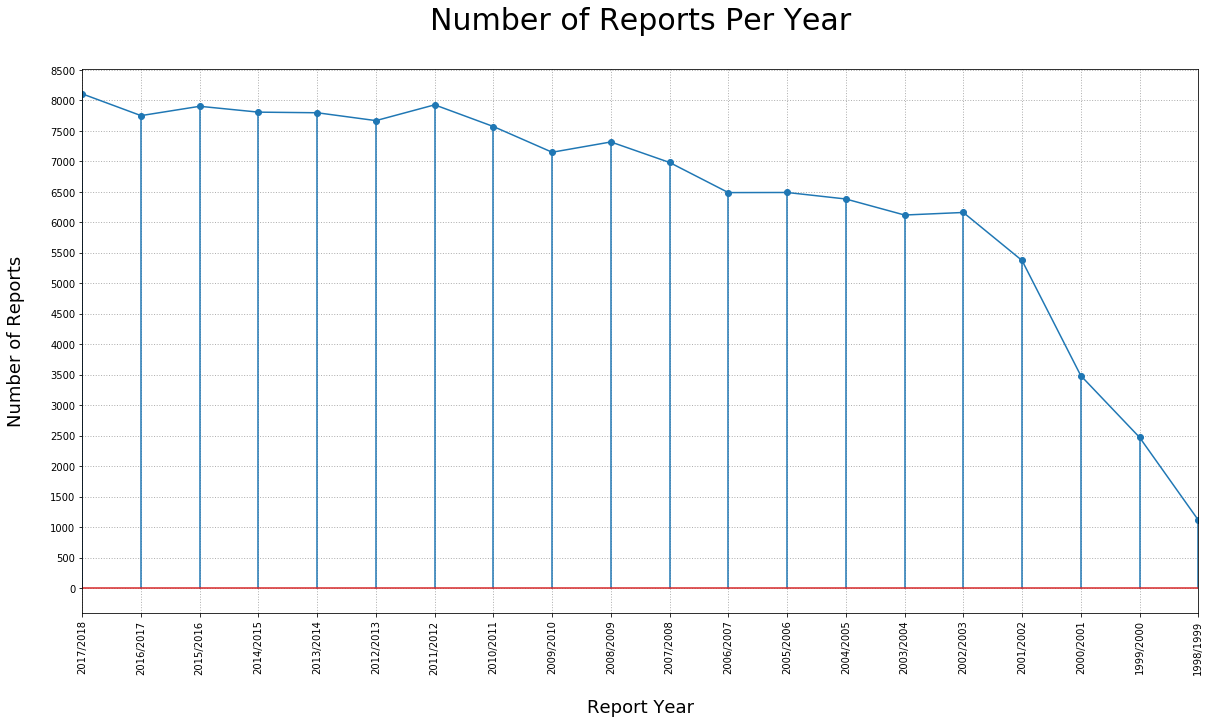

In [21]:
year = nsw_data["report_year"].value_counts(ascending = False)
year.sort_index(inplace = True, ascending = False)
print(year)
base_num = len(year)
# base_num = int(base_num)
print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Number of Reports Per Year" "\n", fontsize = 30)
plt.ylabel("Number of Reports" "\n", fontsize = 18)
plt.xlabel("\n" "Report Year", fontsize = 18)

year.plot()
plt.stem(year)
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)


## Reports have only increased and not decresed with a huge spike between 1198 and 2004 (6yrs)

## Which substance is the most emited over all the years ?

87


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86.]),
 <a list of 87 Text xticklabel objects>)

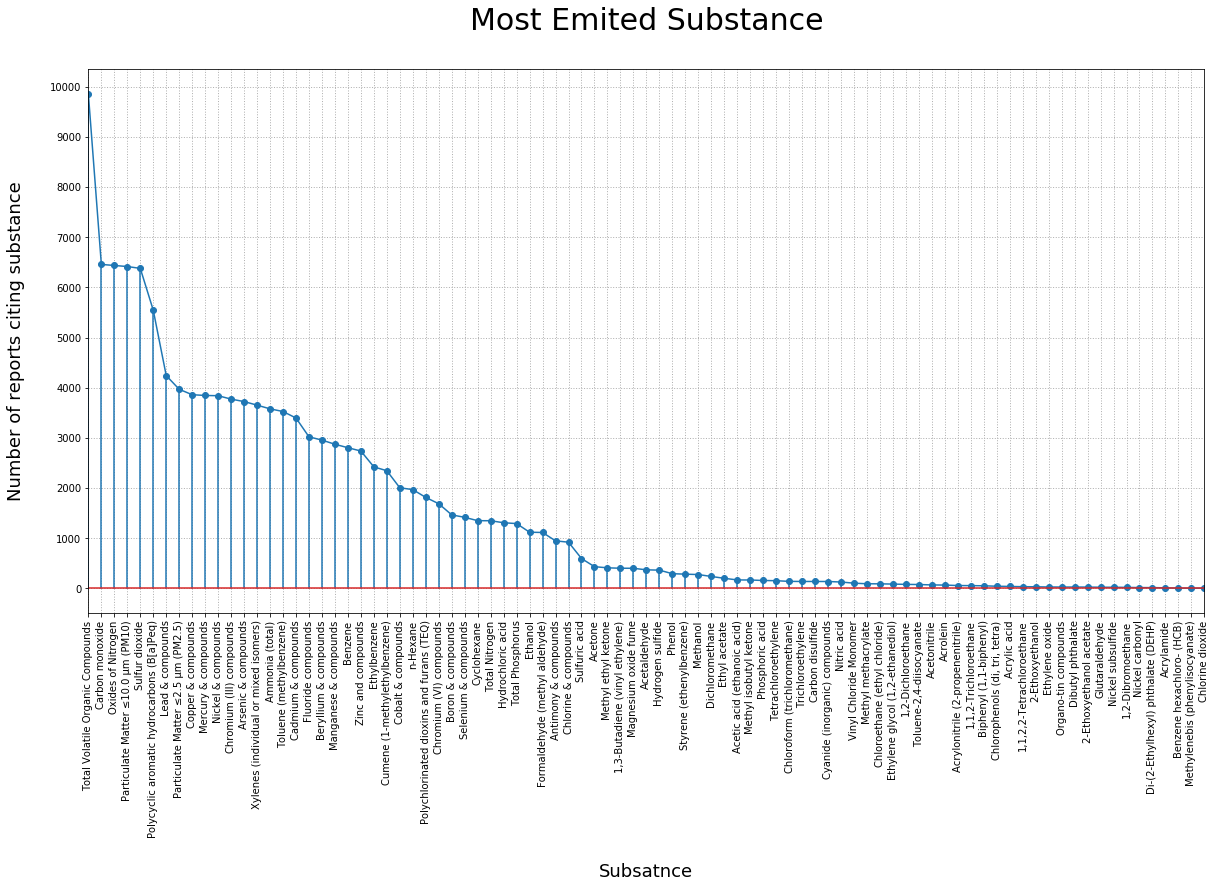

In [22]:
collated_substance = nsw_data["substance_name"].value_counts()

base_num = len(collated_substance)
# base_num = int(base_num)
print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Most Emited Substance" "\n", fontsize = 30)
plt.ylabel("Number of reports citing substance" "\n", fontsize = 18)
plt.xlabel("\n" "Subsatnce", fontsize = 18)

collated_substance[collated_substance > 0].plot()
plt.stem(collated_substance[collated_substance > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)

## What were the most emmited substances each year ?

53


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52.]), <a list of 53 Text xticklabel objects>)

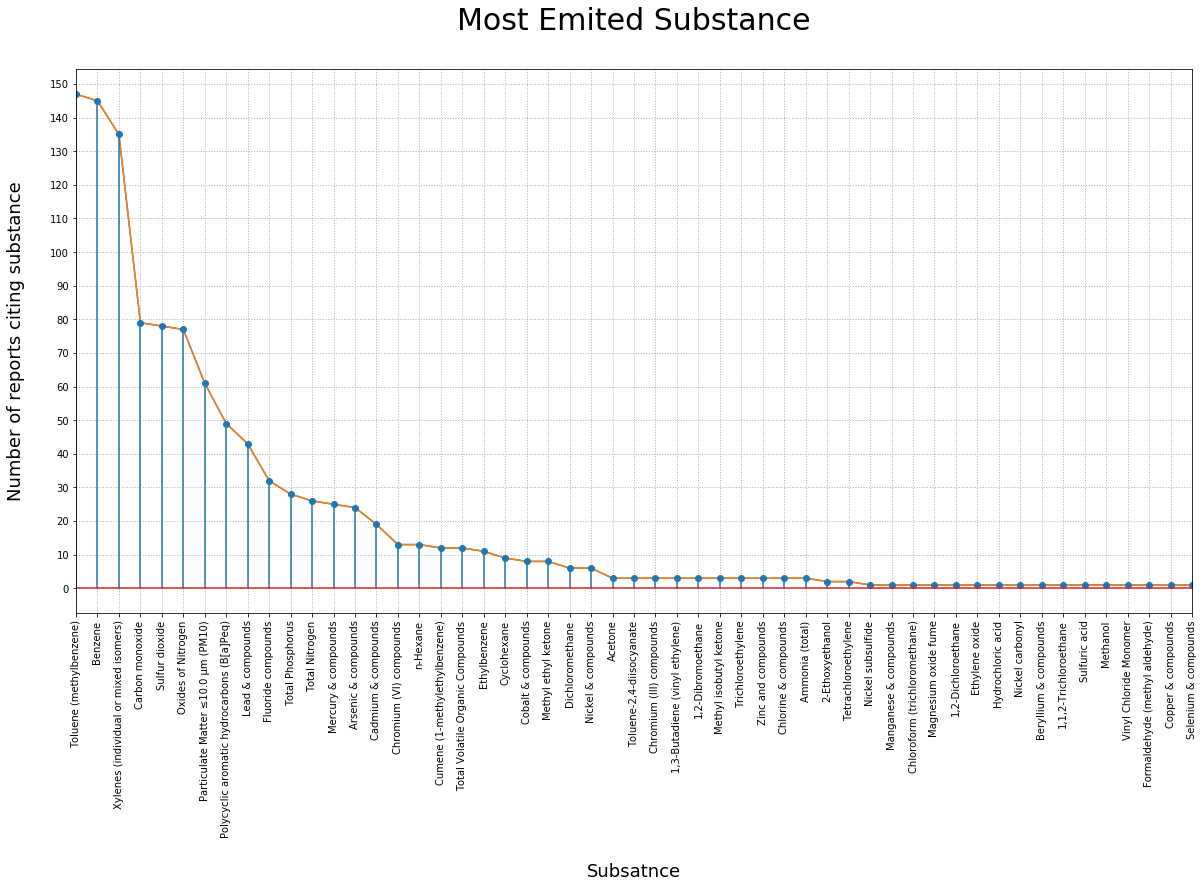

In [23]:
test_val = "1998/1999"

yr_98to99 = nsw_data.loc[nsw_data['report_year'] == test_val]


# yr_98to99.head()

sub_98to99 = yr_98to99["substance_name"].value_counts()

# print(sub_98to99)


sub_98to99.plot()



base_num = len(sub_98to99)
# base_num = int(base_num)
print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Most Emited Substance" "\n", fontsize = 30)
plt.ylabel("Number of reports citing substance" "\n", fontsize = 18)
plt.xlabel("\n" "Subsatnce", fontsize = 18)

sub_98to99[collated_substance > 0].plot()
plt.stem(sub_98to99[sub_98to99 > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)


79
53


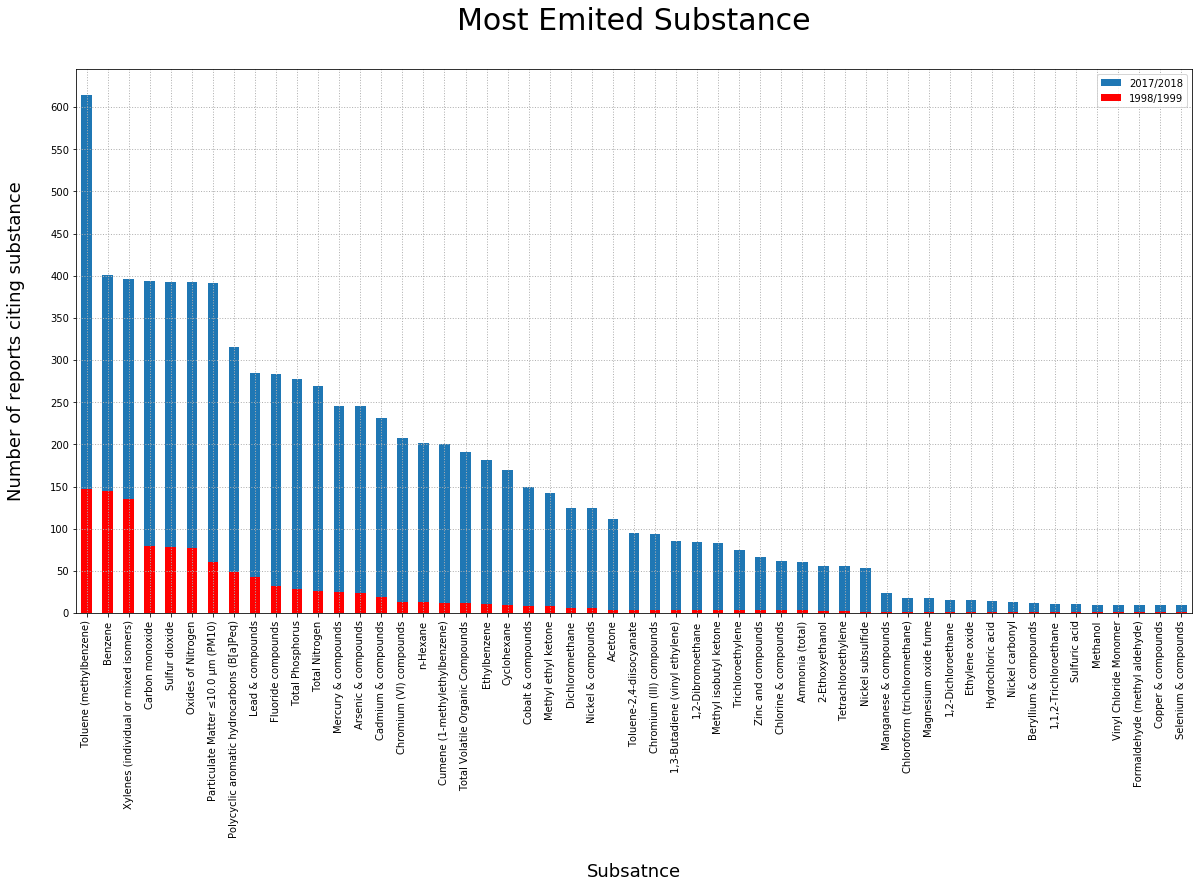

In [68]:
test_val = "1998/1999"

yr_98to99 = nsw_data.loc[nsw_data['report_year'] == test_val]

sub_98to99 = yr_98to99["substance_name"].value_counts()




test_val2 = "2017/2018"

yr_17to18 = nsw_data.loc[nsw_data['report_year'] == test_val2]

sub_17to18 = yr_17to18["substance_name"].value_counts()


base_num = len(sub_17to18)
# base_num = int(base_num)
print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Most Emited Substance" "\n", fontsize = 30)
plt.ylabel("Number of reports citing substance" "\n", fontsize = 18)
plt.xlabel("\n" "Subsatnce", fontsize = 18)

sub_17to18[sub_17to18 > 0].plot(kind = "bar")
# plt.stem(sub_98to99[sub_98to99 > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)





base_num = len(sub_98to99)
# base_num = int(base_num)
print(base_num)

plt.locator_params(axis='x', nbins= base_num)
plt.locator_params(axis='y', nbins=20)
plt.title("Most Emited Substance" "\n", fontsize = 30)
plt.ylabel("Number of reports citing substance" "\n", fontsize = 18)
plt.xlabel("\n" "Subsatnce", fontsize = 18)

sub_98to99[sub_98to99 > 0].plot(kind = "bar", facecolor = 'red')
# plt.stem(sub_98to99[sub_98to99 > 0])
plt.grid(linestyle=':', linewidth=1)

plt.xticks(rotation=90)

plt.legend(["2017/2018","1998/1999"])



(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 20 Text xticklabel objects>)

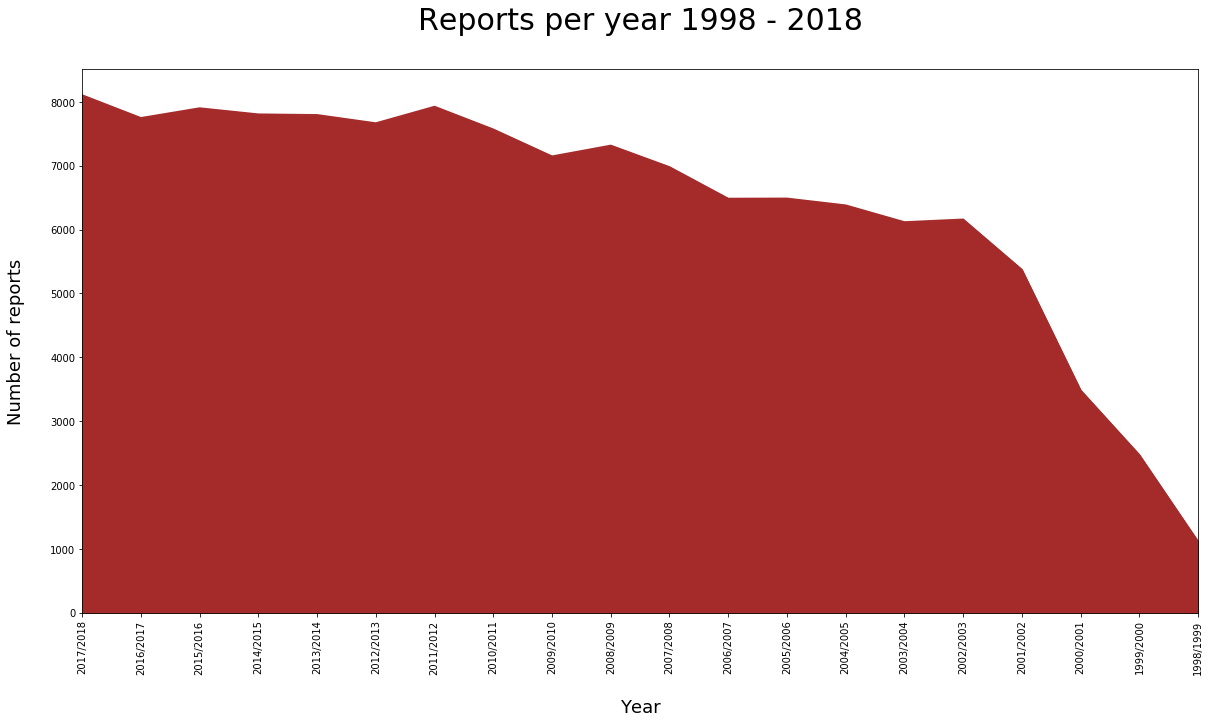

In [108]:
reps_per_year = nsw_data["report_year"].value_counts(sort = False, ascending = False)

reps_per_year.sort_index(inplace = True, ascending = False)

reps_per_year.keys()


plt.locator_params(axis='x', nbins= len(reps_per_year.keys()))

plt.title("Reports per year 1998 - 2018" "\n", fontsize = 30)
plt.ylabel("Number of reports" "\n", fontsize = 18)
plt.xlabel("\n" "Year", fontsize = 18)

reps_per_year.plot(kind = "area", color = 'brown')

plt.xticks(rotation=90)







In [129]:
def sub_plot_year(bool_col, sort_col, start, end, bins):
    
    sub_yr_count = nsw_data[str(bool_col)].value_counts(sort = False, ascending = False)

    sub_yr_count.sort_index(inplace = True, ascending = False)

    years = sub_yr_count.keys()
    
#     base_num = 0
    
    for year in years:

        year_val = str(year)

        crnt_yr = nsw_data.loc[nsw_data[str(bool_col)] == year_val]

        graph =  crnt_yr[str(sort_col)].value_counts()

#         if base_num < len(graph):
#             base_num = len(graph)
#         else:
#             base_num = base_num

        graph.plot()
        
        plt.locator_params(axis='x', nbins= 50)
        
    
    

In [130]:
# def substance_plot(column_name, search_term):
    
#     year_val = str(search_term)

#     crnt_yr = nsw_data.loc[nsw_data[str(column_name)] == year_val]
    
#     return crnt_yr["substance_name"].value_counts()
    
    
    
    

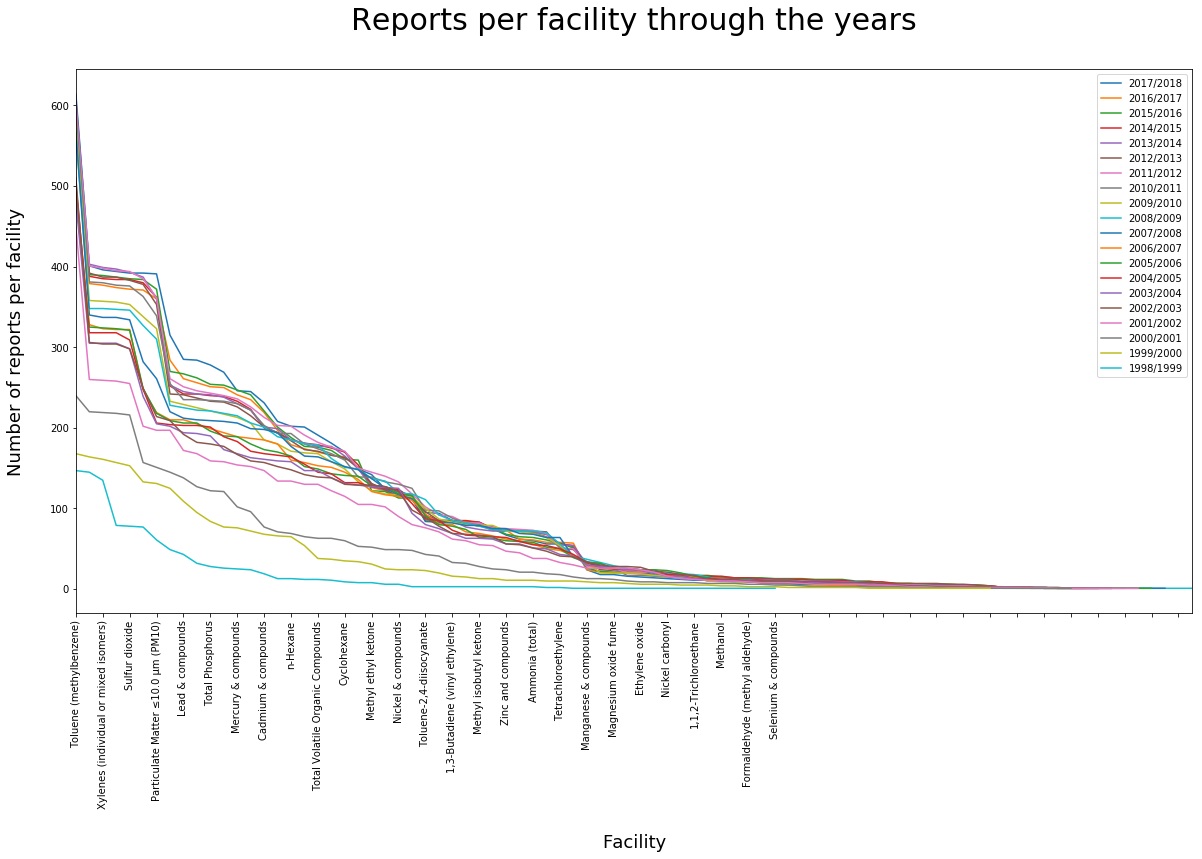

In [131]:
reps_per_year = nsw_data["report_year"].value_counts(sort = False, ascending = False)

reps_per_year.sort_index(inplace = True, ascending = False)

reps_per_year.keys()

plt.title("Reports per facility through the years" "\n", fontsize = 30)
plt.ylabel("Number of reports per facility" "\n", fontsize = 18)
plt.xlabel("\n" "Facility", fontsize = 18)

sub_plot_year("report_year","substance_name",0,-1,30)



plt.xticks(rotation=90)

plt.legend(reps_per_year.keys())



In [121]:
# reps_per_year = nsw_data["report_year"].value_counts(sort = False, ascending = False)

# reps_per_year.sort_index(inplace = True, ascending = False)

# reps_per_year.keys()

# sub_plot_year("report_year","pivot_facility_name",0, -1, 50)

# plt.xticks(rotation=90)

# plt.legend(reps_per_year.keys())


In [111]:
def connect_info(bool_col, sort_col):
    
    sub_yr_count = nsw_data[str(bool_col)].value_counts(sort = False, ascending = False)

    sub_yr_count.sort_index(inplace = True, ascending = False)

    years = sub_yr_count.keys()
    
    g_list = []
    
    for year in years:

        year_val = str(year)

        crnt_yr = nsw_data.loc[nsw_data[str(bool_col)] == year_val]

        graph =  crnt_yr[str(sort_col)].value_counts()
        
        
        graph.rename(str(year))
        
#         print(graph)
        
        g_list.append(graph)
    
    return g_list
        
    



In [112]:
long_coord = connect_info("pivot_facility_name", "longitude")

lat_coord = connect_info("pivot_facility_name", "latitude")

In [113]:
print(long_coord[10])
print(lat_coord[10])

151.42269    91
Name: longitude, dtype: int64
-33.209368    91
Name: latitude, dtype: int64


In [139]:
long_coord[0].index[0]

151.082313

In [114]:
long_coord[0]

151.082313    10
Name: longitude, dtype: int64

In [115]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)
burbs.head(2)

,LC_PLY_PID,DT_CREATE,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry
0,25065,2015-09-03,NSW2557,2015-11-10,MAYFIELD WEST,G,None,1,"POLYGON ((151.73344571654 -32.87974104891, 151..."
1,16193,2011-11-22,NSW4136,2012-02-04,WALLACETOWN,G,None,1,"POLYGON ((147.450924738497 -34.9651865379095, ..."


In [116]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

POINT (151.7246099649729 -32.88497041458911)


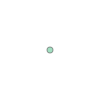

In [117]:
a = burbs.iloc[0]
print(a.centroid)
a.centroid

In [118]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.geometry.distance(right_here)

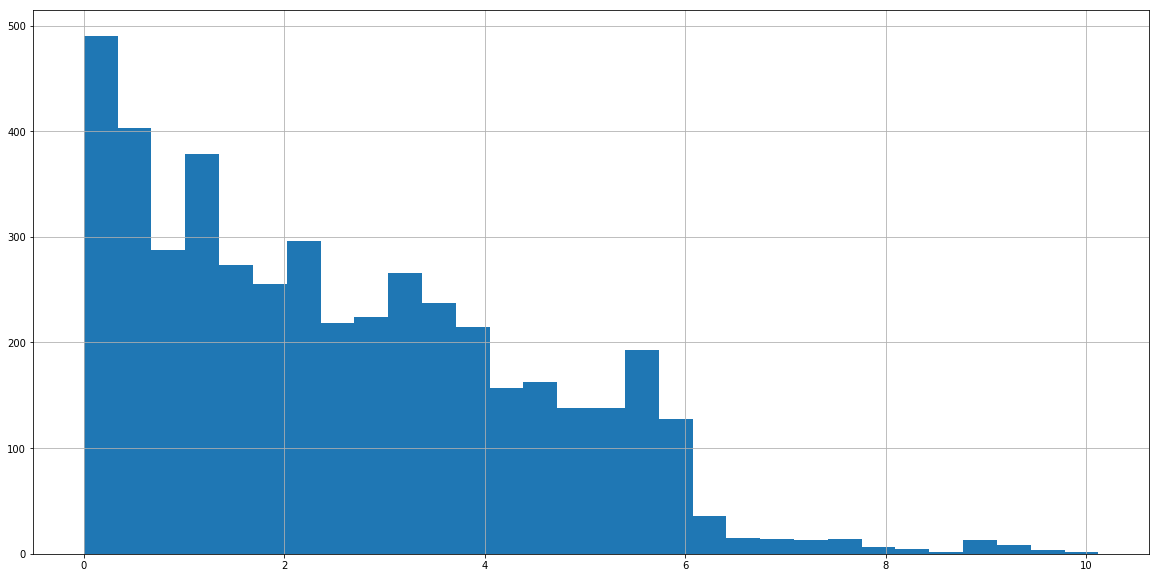

In [119]:
burbs.distance_from_UNSW.hist(bins=30);

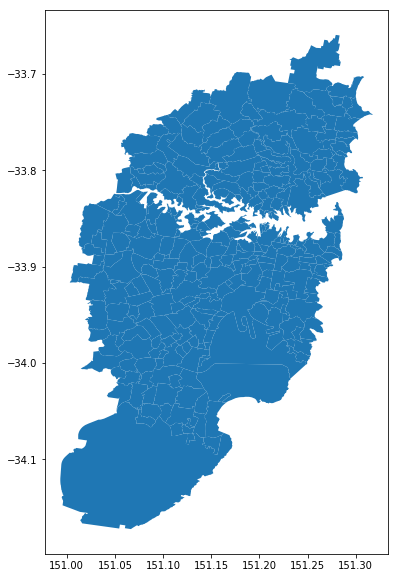

In [120]:
close_burbs = burbs[burbs.distance_from_UNSW<0.2]
close_burbs.plot();